# Finding the best topics to write data science content about in 2022

## 1. Introduction

What is the best content to write about, to help people learn data science? This could be a very relevant business question for a company that creates data science content, such as books, online articles or videos. In order to answer this question, we will first have to establish what we mean by the 'best' content, and the purpose of finding which particular content it is.

The goal of this project is to determine the best content to write about, in order create a customer base of data science learners. For that reason, we will turn to popular question and answer websites such as Stack Overflow. Here, learners (as well as professionals) can ask questions about problems they are encountering and things they want to learn about. By investigating the most popular topics on such websites, we can determine which content is likely to address data sciene learners' interests. In other words, if we can find a pattern of topics that generate a lot of questions on Q&A websites, this should reveal a gap that is currently not or incompletely filled by existing data science content creators.

## 2. The Data

As mentioned, Stack Overflow is a popular website that helps learners find answers to their questions. In fact, the overarching website network Stack Exchange hosts sites on a wide range of fields and subjects. For this project, we will focus on Stack Exchange's data science site; https://datascience.stackexchange.com/. A potentially useful feature of the website is that it allows us to select tags. As the website states: "A tag is a keyword or label that categorizes your question with other, similar questions. Using the right tags makes it easier for others to find and answer your question." As it seems, every question on the website is accomodated with a tag, so that we can find the most popular topics by tag.

The data for this project has been gathered via a query, which was run on the website itself and produced the .csv file that has been read in below. We have queried all available questions from 2021 and 2022, so that the data provides an insight into the most recent popularity of topics.

In [119]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [120]:
data = pd.read_csv('D:/Data Science/Datasets/QueryResults.csv', parse_dates=['CreationDate'])
print(data.info(), 'n\n\n', data.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8706 non-null   int64         
 1   PostTypeId     8706 non-null   int64         
 2   CreationDate   8706 non-null   datetime64[ns]
 3   Score          8706 non-null   int64         
 4   ViewCount      8706 non-null   int64         
 5   Tags           8706 non-null   object        
 6   AnswerCount    8706 non-null   int64         
 7   FavoriteCount  684 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 544.2+ KB
None n

           Id  PostTypeId        CreationDate  Score  ViewCount  \
2308   95223           1 2021-06-03 11:55:07      1        139   
2187   94889           1 2021-05-25 14:54:28      0        114   
7941  110810           1 2022-05-09 20:51:13      0          8   
2952   97915           1 202

#### Data Cleaning

Inspecting the data, we observe that we have missing values in only one column: the number of times a post has been marked as a favorite. This in itself is not problematic however; it is to be expected that only a small proportion of all posts will be marked as a favorite by other visitors. In fact, the favorited posts may be helpful in determining the most popular topics that data science learners want to learn more about. This will be further elaborated later. The column's missing values will be filled in with zeros, so that we can use the column in our analysis.

One column that is problematic, is the tags column. As shown in the code output below, there are 6,957 different tags. A quick look at the sample displayed above shows that whenever a question has multiple tags, these have been merged into one long string. We would expect that there are actually only a few dozens of different tags at most, such as 'python' and 'machine learning', so this column needs some attention.

In [121]:
#filling the non-values with zeros
data['FavoriteCount'].fillna(0, inplace = True)
data['FavoriteCount'] = data['FavoriteCount'].astype(int)

In [122]:
#inspecting the number of different values in the 'Tags' column
print(data['Tags'].nunique())

6957


In [123]:
#removing and replacing angle brackets with commas
data['Tags'] = data['Tags'].str.replace('<', '').str.replace('>', ',')

#splitting the 'Tags' column values into lists
data['Tags'] = data['Tags'].str.split(pat = ',')

#removing the whitespace at the end of every list
data['Tags'] = data['Tags'].str[:-1]

In [124]:
#inspecting the cleaned column
print(data['Tags'].head())

0                                     [decision-trees]
1    [machine-learning, python, deep-learning, imag...
2           [neural-network, deep-learning, inception]
3        [machine-learning, cloud, federated-learning]
4                 [reinforcement-learning, openai-gym]
Name: Tags, dtype: object


## 3. Visualizing the best topics

In [250]:
#creating an empty dictionary
tag_count = {}

#defining a function that fills the dictionary with tag counts
for tags in data['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

#converting the dictionary to a dataframe
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: 'Counts'}, inplace=True)

#storing the top 20 in a seperate variable
top_20_tags = tag_count['Counts'].sort_values().tail(20)

#capitalizing the first letter of each tag
top_20_tags.index = top_20_tags.index.str.title()

#capitalizing individual abreviations
top_20_tags.rename(index={'Nlp':'NLP', 'Cnn':'CNN', 'Lstm': 'LSTM'},inplace=True)

In [251]:
#creating an empty dictionary
tag_view_count = {}

#defining a function that fills the dictionary with tag counts
for index, row in data.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

#converting the dictionary to a dataframe            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)          

#storing the top 20 in a seperate variable
top_20_views = tag_view_count['ViewCount'].sort_values().tail(20)

#capitalizing the first letter of each tag
top_20_views.index = top_20_views.index.str.title()
top_20_views.rename(index={'Nlp':'NLP', 'Cnn':'CNN'},inplace=True)

In [252]:
from matplotlib import pyplot as plt
%matplotlib inline

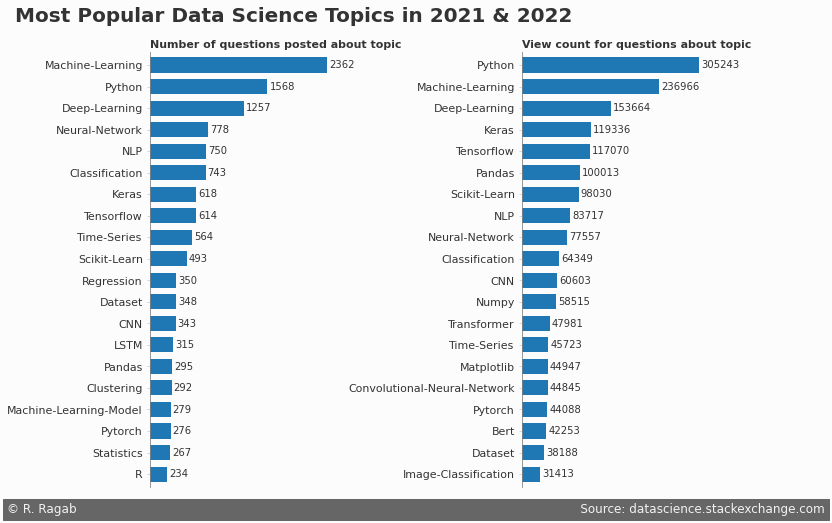

In [290]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))

top_20_tags.plot(kind='barh', ax=ax1, width=0.7)
ax1.spines[['top', 'bottom', 'right']].set_visible(False)
ax1.spines['left'].set_color('0.5')
ax1.tick_params(axis='y', labelsize=11, color='0.8', labelcolor='0.2')
ax1.tick_params(bottom=False, labelbottom = False)
for container in ax1.containers:
    ax1.bar_label(container, padding=2, color='0.2', fontsize=10)
ax1.text(x=-1800, y=21, s='Most Popular Data Science Topics in 2021 & 2022', weight='bold', size=20, color='0.2')
ax1.text(x=0, y=19.8, s='Number of questions posted about topic', weight='bold', size=11, color='0.2')
ax1.text(x=-1900, y=-1.8, s='© R. Ragab' + 130*' ' + 'Source: datascience.stackexchange.com', size=12, color='0.95', backgroundcolor='0.4')

top_20_views.plot(kind='barh', ax=ax2, width=0.7)
ax2.spines[['top', 'bottom', 'right']].set_visible(False)
ax2.spines['left'].set_color('0.5')
ax2.tick_params(axis='y', labelsize=11, color='0.8', labelcolor='0.2')
ax2.tick_params(bottom=False, labelbottom = False)
for container in ax2.containers:
    ax2.bar_label(container, padding=2, color='0.2', fontsize=10)
ax2.text(x=0, y=19.8, s='View count for questions about topic', weight='bold', size=11, color='0.2')

fig.set_facecolor('0.99')
ax1.set_facecolor('0.99')
ax2.set_facecolor('0.99')
plt.subplots_adjust(wspace=1)


## 4. Analysis

The figure above displays the number of questions and the view count for those questions per topic. What stands out is that questions about machine learning and python are the most popular ones by a significant distance, followed by deep learning. Taking a closer look however, many of the following topics are closely related to the most popular topics. For example, NLP (Natural Language Processing) is a field within machine learning, CNN (Convolutional Neural Network) is a class within deep learning and skicit-learn is a python library for machine learning. In fact, only a few of the most popular tags are not (directly) related to abovementioned topics: R is a programming language, and regression, clustering and time series are statistical methods. Of course, statistics are essential for machine learning and deep learning. It may also be worth noting that numpy, pandas and matplotlib, some of the most popular python libraries, are used for a wide variety of purposes within data science. 

Altogether, our findings suggest that there are two clusters of topics that may attract the largest audiences. On the one hand, writing content about the python language and some of its most popular, multipurpose libraries - numpy, pandas and matplotlib - should be helpful to a broad audience of learners with a wide range of experience, skills, fields and goals. On the other hand, learners seem to have many questions about some of the most advanced topics within data science - machine learning and deep learning. This suggest that writing content on machine learning and deep learning, and the most useful libraries and methods within these field, should also attract a substantial audience.

Additional research could incorporate data from other websites within the Stack Exchange network. For instance, data from Stack Overflow may provide us with more information about trends within the programming side, especially when focusing on languages such as python, R and java, which are commonly used in data science. Also, data from the Mathematics Stack Exchange could provide an insight into the questions that learners have about the statistical side of data science. Besides, this project is built on relatively recent data, so that we can see which topics are relevant now and in the near future. A larger timeframe could help identify trends for the long term, such as the emergence and decline of certain topics.